<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/random_forest_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#랜덤 포레스트 와인 퀄리티


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/winequality-red.csv',sep=';')#sep으로 분할기준 바꿀 수 있음
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.columns=[col.replace(" ","_") for col in df.columns]

In [6]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#EDA


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [10]:
df.describe

<bound method NDFrame.describe of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]>

In [11]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


<Axes: xlabel='quality', ylabel='count'>

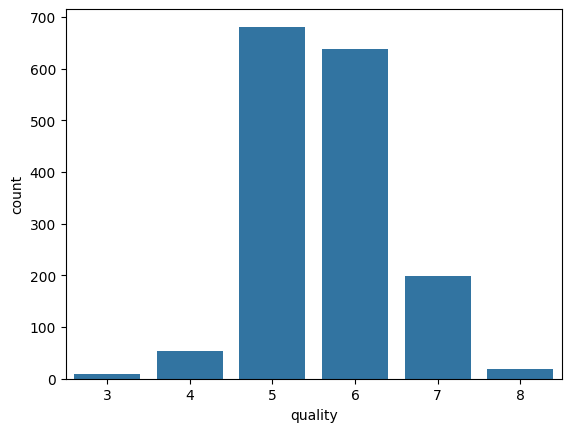

In [12]:
sns.countplot(x='quality',data=df)

# 타겟 범주 변경

- 3,4 -> low
- 5,6 -> medium
- 7,8 -> high

In [13]:
df.loc[(df['quality']==3)|(df['quality']==4),'quality']='low'
df.loc[(df['quality']==5)|(df['quality']==6),'quality']='medium'
df.loc[(df['quality']==7)|(df['quality']==8),'quality']='high'

<ipython-input-13-5fcd3b40c50e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['quality']==3)|(df['quality']==4),'quality']='low'


In [14]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


In [15]:
df['quality'].value_counts()

,count
quality,
medium,1319
high,217
low,63


#결측치 확인

In [16]:
df.isna().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [17]:
x=df.drop('quality',axis=1)
y=df['quality']

In [18]:
x,y

(      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free_su

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [22]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
719,7.1,0.660,0.00,3.9,0.086,17.0,45.0,0.99760,3.46,0.54,9.5
991,7.1,0.340,0.28,2.0,0.082,31.0,68.0,0.99694,3.45,0.48,9.4
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0
1431,7.6,0.430,0.31,2.1,0.069,13.0,74.0,0.99580,3.26,0.54,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1458,8.4,0.290,0.40,1.7,0.067,8.0,20.0,0.99603,3.39,0.60,10.5
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9


In [23]:
!pip install imbalanced-learn

In [24]:
from imblearn.over_sampling import SMOTE

# smote=SMOTE(random_state=42)
# x_train,y_train=smote.fit_resample(x_train,y_train)

In [25]:
x_train.value_counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH    sulphates  alcohol
7.2            0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1       4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5        3
9.3            0.360             0.39         1.5             0.080      41.0                 55.0                  0.99652  3.47  0.73       10.9       3
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5       3
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6       3
                                                                                                                                                        ..
7.4            0.670             0.12         1.6             0.186      5.0                  21.0                  0.99600  3.39  0.54       9.5        1
               0.680             0.16         1.8             0.078      12.0                 39.0                  0.99770  3.50  0.70       9.9        1
               0.700             0.00         1.9             0.076      11.0                 34.0                  0.99780  3.51  0.56       9.4        1
               0.785             0.19         5.2             0.094      19.0                 98.0                  0.99713  3.16  0.52       9.6        1
7.9            0.350             0.46         3.6             0.078      15.0                 37.0                  0.99730  3.35  0.86       12.8       1
Name: count, Length: 1117, dtype: int64

#베이스 모델

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [28]:
columns=x_train.columns

In [29]:
x_train_r=x_train.to_numpy()
y_train_r=y_train.to_numpy()
x_test_r=x_test.to_numpy()
y_test_r=y_test.to_numpy()

In [30]:
clf.fit(x_train_r,y_train_r)

RandomForestClassifier(random_state=42)

In [31]:
y_pred=clf.predict(x_test_r)

#평가

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


acc: 0.865625
re: 0.49251233262861166
pre: 0.5306767868437697
f1: 0.5056123030806575


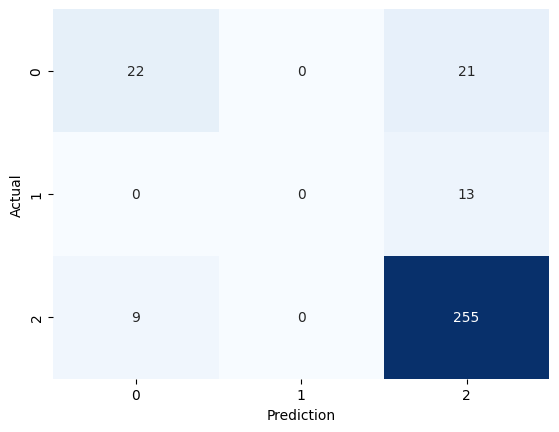

In [33]:
print_metrics(y_test_r,y_pred)

# 중요변수

In [34]:
clf.feature_importances_

array([0.08330115, 0.13004574, 0.08506428, 0.0732063 , 0.07186439,
       0.06461945, 0.08019378, 0.0924126 , 0.0679589 , 0.10446694,
       0.14686647])

In [35]:
# importances=pd.DataFrame(clf.feature_importances_,columns)
# importances.sort_values(by=['importances'],ascending=False)

#다른 모델 학습시키기

학습, 테스트 데이터 분리
스케일링, 인코딩
scv 학습
테스트 평가

In [36]:
x=df.drop('quality',axis=1)
y=df['quality']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [38]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1279, 11), (1279,), (320, 11), (320,))

In [39]:

# smote=SMOTE(random_state=42)
# x_train,y_train=smote.fit_resample(x_train,y_train)

In [40]:
from sklearn.svm import SVC

In [41]:
x_train_r=x_train.to_numpy()
y_train_r=y_train.to_numpy()

In [42]:
svc=SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [43]:
x_test.shape

(320, 11)

In [44]:
y_pred=svc.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix


def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


acc: 0.825
re: 0.3333333333333333
pre: 0.27499999999999997
f1: 0.3013698630136986


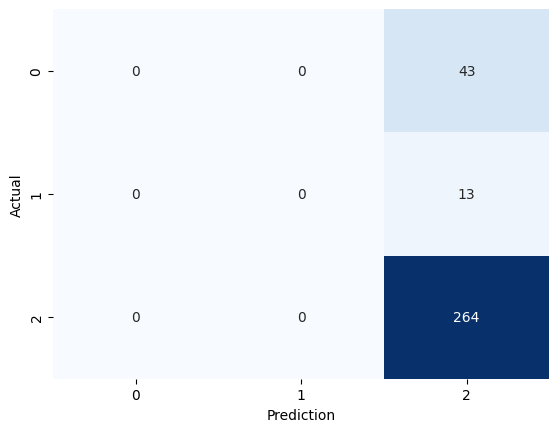

In [46]:
print_metrics(y_test,y_pred)#증강하면 더 낮게 나옴